In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import chi2

Main Marketing Questions:

1 - What is our client's gender, age, marital status, education, family size and income. 
2 - Where does them live?
3 - Why people are not willing to eat insects?
4 - What is the type of food with insects that they were more willing to eat?
5 - Why would they eat insects? (to set up the communication method with the audience)
6 - Is there a correlation between people that would try eating insects and the other types of alternative proteins ( lab grown meat and plant based Proteins)?

# Importing files

In [66]:
db = pd.read_csv("OMNICM20651+Alternative+proteins+data+file+v2+public+use.csv")
db1 = pd.read_csv("OMNICM20651+Alternative+proteins+data+file+v2+public+use.csv")

In [3]:
db.head()

,DMQ_RESP_GENDER,DMQ_RESP_AGE_RECODED,DMQ_REGION,DMQ_HHCMP10,DMQ_KIDS02,DMQ_UK02EDU,DMQ_UK01MAR,DMQ_UK02INC,DMQ_UK02ETH,DMQ_EMP01,...,Q2073788224__14,Q2073788224__15,Q2073788224__16,Q2053017755,Q2079418049Wholeedibleinsects,Q2079418049Groundintoafoodforaddedproteinegbreadburgersfalaf,Q2079418049Madeintosweetsorjellies,Q2079418049Madeintobeveragesegsportsdrinksproteinshakes,Q2079418049Amealorproteinreplacement,DPWeight
0,2,2,5,3,1,5,3,4,2,6,...,0,0,1,,3,3,3,3,3,1.44043
1,2,1,10,3,0,5,1,3,2,2,...,,,,,1,2,2,2,3,0.66943
2,2,2,9,3,2,6,3,5,2,1,...,,,,,2,6,6,5,5,0.82482
3,1,3,4,6,4,2,3,5,2,1,...,0,0,0,,2,1,2,1,1,0.83600
4,2,3,2,6,3,3,3,4,2,6,...,,,,,3,3,3,3,3,0.98356


In [4]:
db.shape

(1930, 167)

In [5]:
db.dtypes

DMQ_RESP_GENDER                                                   int64
DMQ_RESP_AGE_RECODED                                              int64
DMQ_REGION                                                        int64
DMQ_HHCMP10                                                       int64
DMQ_KIDS02                                                        int64
                                                                 ...   
Q2079418049Groundintoafoodforaddedproteinegbreadburgersfalaf      int64
Q2079418049Madeintosweetsorjellies                                int64
Q2079418049Madeintobeveragesegsportsdrinksproteinshakes           int64
Q2079418049Amealorproteinreplacement                              int64
DPWeight                                                        float64
Length: 167, dtype: object

The only numeric variable is 'DMQ_HHCMP10' (Household size) and DP weight (The rest will need to be converted)

In [6]:
#converting the type of the variables
db = db.astype(object)
db['DPWeight'] = db['DPWeight'].astype(float)
db['DMQ_HHCMP10'] = db['DMQ_HHCMP10'].astype(int)

In [7]:
db.dtypes

DMQ_RESP_GENDER                                                  object
DMQ_RESP_AGE_RECODED                                             object
DMQ_REGION                                                       object
DMQ_HHCMP10                                                       int32
DMQ_KIDS02                                                       object
                                                                 ...   
Q2079418049Groundintoafoodforaddedproteinegbreadburgersfalaf     object
Q2079418049Madeintosweetsorjellies                               object
Q2079418049Madeintobeveragesegsportsdrinksproteinshakes          object
Q2079418049Amealorproteinreplacement                             object
DPWeight                                                        float64
Length: 167, dtype: object

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Columns: 167 entries, DMQ_RESP_GENDER to DPWeight
dtypes: float64(1), int32(1), object(165)
memory usage: 2.5+ MB


# Looking empty values

In [9]:
#The dataset has many empty values that were inputed with a space that Pandas does not recognize. To go around that we will use
#the following code

db = db.replace(' ',np.nan)

C:\Temp\ipykernel_10196\3257374438.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db = db.replace(' ',np.nan)


In [10]:
pd.set_option("display.max_rows" , None)

db.isna().sum()

DMQ_RESP_GENDER                                                    0
DMQ_RESP_AGE_RECODED                                               0
DMQ_REGION                                                         0
DMQ_HHCMP10                                                        0
DMQ_KIDS02                                                         0
DMQ_UK02EDU                                                        0
DMQ_UK01MAR                                                        0
DMQ_UK02INC                                                        0
DMQ_UK02ETH                                                       22
DMQ_EMP01                                                          0
DMQ_EMP01_RECODED                                                  0
UK01SG                                                             0
DMQ_UK01SG_RECODED                                                 0
Q2089090438Edibleinsects                                           0
Q2089090438Labgrownmeatsometimesre

In [11]:
percent_missing = db.isnull().sum() * 100 / len(db)
percent_missing

DMQ_RESP_GENDER                                                   0.000000
DMQ_RESP_AGE_RECODED                                              0.000000
DMQ_REGION                                                        0.000000
DMQ_HHCMP10                                                       0.000000
DMQ_KIDS02                                                        0.000000
DMQ_UK02EDU                                                       0.000000
DMQ_UK01MAR                                                       0.000000
DMQ_UK02INC                                                       0.000000
DMQ_UK02ETH                                                       1.139896
DMQ_EMP01                                                         0.000000
DMQ_EMP01_RECODED                                                 0.000000
UK01SG                                                            0.000000
DMQ_UK01SG_RECODED                                                0.000000
Q2089090438Edibleinsects 

#In the survey, looking at the data dictionary, we can see that the many empty values are related to multi-choice questions, 
and empty values means the person did not reply to this question specifically. I will add the value 2 to this columns that means (no answers). 

For DMQ_UK02ETH (it's the etnicity, so I implied that the person did not want to reply, in this case we will replace the empty value for 24 (Prefer not to answer)

For Q2055782931 the question is about how safe the person thinks is to eat edible insects, to avoid loosing important data by deleting these rows and as the percentage of empty values is low we will replace it by the mode

For Q2053017755 it has 100% missing valus so I will drop the column.

In [12]:
db['DMQ_UK02ETH'] = db['DMQ_UK02ETH'].replace(np.nan, '24')
db['Q2055782931'] = db['Q2055782931'].replace(np.nan, db['Q2055782931'].mode()[0])

In [13]:
percent_missing = db.isnull().sum() * 100 / len(db)
percent_missing

DMQ_RESP_GENDER                                                   0.000000
DMQ_RESP_AGE_RECODED                                              0.000000
DMQ_REGION                                                        0.000000
DMQ_HHCMP10                                                       0.000000
DMQ_KIDS02                                                        0.000000
DMQ_UK02EDU                                                       0.000000
DMQ_UK01MAR                                                       0.000000
DMQ_UK02INC                                                       0.000000
DMQ_UK02ETH                                                       0.000000
DMQ_EMP01                                                         0.000000
DMQ_EMP01_RECODED                                                 0.000000
UK01SG                                                            0.000000
DMQ_UK01SG_RECODED                                                0.000000
Q2089090438Edibleinsects 

In [14]:
db = db.drop('Q2053017755', axis=1)

In [15]:
db = db.replace(np.nan, '2')

In [16]:
percent_missing = db.isnull().sum() * 100 / len(db)
percent_missing

DMQ_RESP_GENDER                                                 0.0
DMQ_RESP_AGE_RECODED                                            0.0
DMQ_REGION                                                      0.0
DMQ_HHCMP10                                                     0.0
DMQ_KIDS02                                                      0.0
DMQ_UK02EDU                                                     0.0
DMQ_UK01MAR                                                     0.0
DMQ_UK02INC                                                     0.0
DMQ_UK02ETH                                                     0.0
DMQ_EMP01                                                       0.0
DMQ_EMP01_RECODED                                               0.0
UK01SG                                                          0.0
DMQ_UK01SG_RECODED                                              0.0
Q2089090438Edibleinsects                                        0.0
Q2089090438Labgrownmeatsometimesreferredtoascult

In [17]:
# Checking for duplicates 
db = db.drop_duplicates()

# Exploratory Analysis

In [18]:
db["DMQ_RESP_GENDER"].value_counts()

DMQ_RESP_GENDER
2    1064
1     866
Name: count, dtype: int64

## Performing Chi2 analysis to verify the variables that are more important for the dataset

In [67]:
df_selected = db[['DMQ_RESP_GENDER', 'DMQ_RESP_AGE_RECODED', 'DMQ_REGION', 'DMQ_HHCMP10', 'DMQ_KIDS02', 'DMQ_UK02EDU', 'DMQ_UK01MAR', 'DMQ_UK02INC', 'DMQ_UK02ETH',
'DMQ_EMP01_RECODED', 'DMQ_UK01SG_RECODED', 'Q2089090438Edibleinsects']]

In [68]:
columns = ['Gender', 'Age', 'Region', 'Household size', 'Numer of Kids', 'Education', 'Marital Status', 'Income', 'Ethnicity', 'Working Status', 'Social Grade', 'Insects safe or not']

In [69]:
df_selected.columns = columns
df_selected

,Gender,Age,Region,Household size,Numer of Kids,Education,Marital Status,Income,Ethnicity,Working Status,Social Grade,Insects safe or not
0,2,2,5,3,1,5,3,4,2,2,4,4
1,2,1,10,3,0,5,1,3,2,1,2,2
2,2,2,9,3,2,6,3,5,2,1,1,1
3,1,3,4,6,4,2,3,5,2,1,1,1
4,2,3,2,6,3,3,3,4,2,2,4,4
5,2,4,8,1,0,3,1,6,2,1,3,2
6,2,3,9,1,0,6,1,8,2,1,1,1
7,1,2,10,2,0,5,3,5,2,1,2,1
8,2,3,2,3,1,5,2,8,2,1,1,3
9,1,1,2,4,2,6,3,8,2,1,1,1


In [ ]:
def chi_square_test

In [80]:
X = df_selected.drop(columns='Insects safe or not', axis=1)
Y = df_selected['Insects safe or not']

In [81]:
chi_scores = chi2(X, Y)
chi_scores

TypeError: 'numpy.float64' object is not callable

<Axes: >

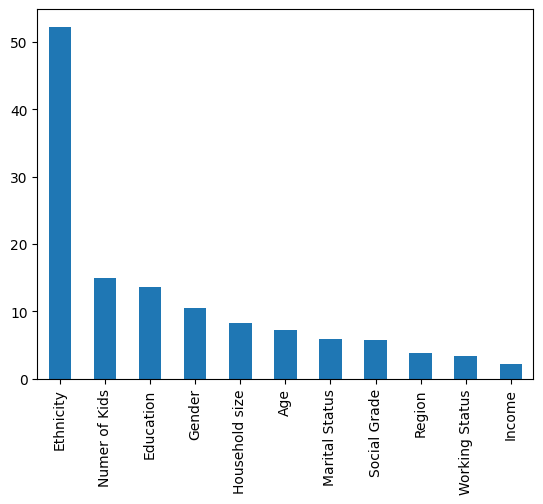

In [82]:
#Higher the Chi Value, Higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

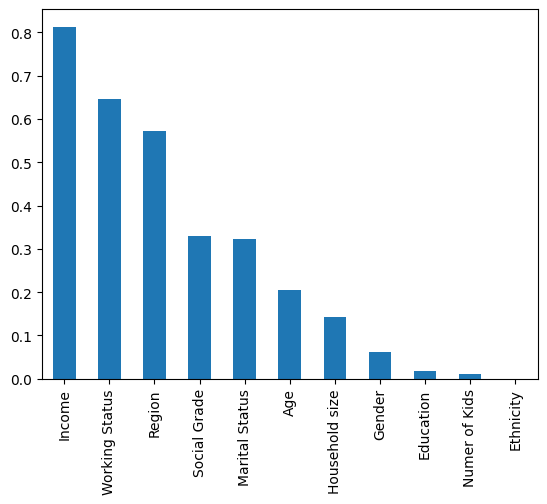

In [73]:
#Higher the p-Value, Lower the importance
chi_values = pd.Series(chi_scores[1], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

In [78]:
chi_values

Ethnicity         52.272340
Numer of Kids     15.009914
Education         13.575068
Gender            10.540182
Household size     8.267743
Age                7.229334
Marital Status     5.837181
Social Grade       5.762531
Region             3.834837
Working Status     3.347994
Income             2.253760
dtype: float64

In [26]:
#For the graphs need to change the data to text since it was encoded in the original database (info available in the dictionary)
db_1 = db
db_1["DMQ_RESP_GENDER"] = db_1["DMQ_RESP_GENDER"].replace(1, 'Male')
db_1["DMQ_RESP_GENDER"] = db_1["DMQ_RESP_GENDER"].replace(2, 'Female')

db_1["DMQ_RESP_AGE_RECODED"] = db_1["DMQ_RESP_AGE_RECODED"].replace(1, '16-24')
db_1["DMQ_RESP_AGE_RECODED"] = db_1["DMQ_RESP_AGE_RECODED"].replace(2, '25-34')
db_1["DMQ_RESP_AGE_RECODED"] = db_1["DMQ_RESP_AGE_RECODED"].replace(3, '35-44')
db_1["DMQ_RESP_AGE_RECODED"] = db_1["DMQ_RESP_AGE_RECODED"].replace(4, '45-54')
db_1["DMQ_RESP_AGE_RECODED"] = db_1["DMQ_RESP_AGE_RECODED"].replace(5, '55-64')
db_1["DMQ_RESP_AGE_RECODED"] = db_1["DMQ_RESP_AGE_RECODED"].replace(6, '65-75')

db_1["DMQ_REGION"] = db_1["DMQ_REGION"].replace(1, 'North East')
db_1["DMQ_REGION"] = db_1["DMQ_REGION"].replace(2, 'North West')
db_1["DMQ_REGION"] = db_1["DMQ_REGION"].replace(3, 'Yorkshire and The Humber')
db_1["DMQ_REGION"] = db_1["DMQ_REGION"].replace(4, 'West Midlands')
db_1["DMQ_REGION"] = db_1["DMQ_REGION"].replace(5, 'East Midlands')
db_1["DMQ_REGION"] = db_1["DMQ_REGION"].replace(6, 'East of England')
db_1["DMQ_REGION"] = db_1["DMQ_REGION"].replace(7, 'South West')
db_1["DMQ_REGION"] = db_1["DMQ_REGION"].replace(8, 'South East')
db_1["DMQ_REGION"] = db_1["DMQ_REGION"].replace(9, 'Greater London')
db_1["DMQ_REGION"] = db_1["DMQ_REGION"].replace(10, 'Wales')
db_1["DMQ_REGION"] = db_1["DMQ_REGION"].replace(11, 'Scotland')
db_1["DMQ_REGION"] = db_1["DMQ_REGION"].replace(12, 'Northern Ireland')

db_1["DMQ_UK02EDU"] = db_1["DMQ_UK02EDU"].replace(1, 'Primary school')
db_1["DMQ_UK02EDU"] = db_1["DMQ_UK02EDU"].replace(2, 'Secondary school (age under 15 years old)')
db_1["DMQ_UK02EDU"] = db_1["DMQ_UK02EDU"].replace(3, 'GNVQ / GSVQ / GCSE/ SCE standard')
db_1["DMQ_UK02EDU"] = db_1["DMQ_UK02EDU"].replace(4, 'NVQ1, NVQ2')
db_1["DMQ_UK02EDU"] = db_1["DMQ_UK02EDU"].replace(5, 'NVQ3/ SCE Higher Grade/ Advanced GNVQ/ GCE A/AS or similar')
db_1["DMQ_UK02EDU"] = db_1["DMQ_UK02EDU"].replace(6, 'NVQ4 / HNC / HND / Bachelor\'s degree or similar')
db_1["DMQ_UK02EDU"] = db_1["DMQ_UK02EDU"].replace(7, 'NVQ5 or post-graduate diploma')

db_1["DMQ_UK01MAR"] = db_1["DMQ_UK01MAR"].replace(1, 'Never Married (Single)')
db_1["DMQ_UK01MAR"] = db_1["DMQ_UK01MAR"].replace(2, 'Domestic Partner')
db_1["DMQ_UK01MAR"] = db_1["DMQ_UK01MAR"].replace(3, 'Married / Civil partnership')
db_1["DMQ_UK01MAR"] = db_1["DMQ_UK01MAR"].replace(4, 'Separated')
db_1["DMQ_UK01MAR"] = db_1["DMQ_UK01MAR"].replace(5, 'Divorced')
db_1["DMQ_UK01MAR"] = db_1["DMQ_UK01MAR"].replace(6, 'Widowed')

db_1["DMQ_UK02INC"] = db_1["DMQ_UK02INC"].replace(1, 'Under £5,000')
db_1["DMQ_UK02INC"] = db_1["DMQ_UK02INC"].replace(2, '£5,000 - 9,999')
db_1["DMQ_UK02INC"] = db_1["DMQ_UK02INC"].replace(3, '£10,000 - 14,999')
db_1["DMQ_UK02INC"] = db_1["DMQ_UK02INC"].replace(4, '£15,000 - 19,999')
db_1["DMQ_UK02INC"] = db_1["DMQ_UK02INC"].replace(5, '£20,000 - 24,999')
db_1["DMQ_UK02INC"] = db_1["DMQ_UK02INC"].replace(6, '£25,000 - 34,999')
db_1["DMQ_UK02INC"] = db_1["DMQ_UK02INC"].replace(7, '£35,000 - 44,999')
db_1["DMQ_UK02INC"] = db_1["DMQ_UK02INC"].replace(8, '£45,000 - 54,999')
db_1["DMQ_UK02INC"] = db_1["DMQ_UK02INC"].replace(9, '£55,000 - 99,999')
db_1["DMQ_UK02INC"] = db_1["DMQ_UK02INC"].replace(10, '£100,000 or more')
db_1["DMQ_UK02INC"] = db_1["DMQ_UK02INC"].replace(11, 'Prefer not to answer')

db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('1', 'White')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('2', 'English / Welsh / Scottish / Northern Irish / British')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('3', 'Irish')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('4', 'Gypsy or Irish Traveller')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('5', 'Any other White background')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('6', 'Mixed / multiple ethnic groups')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('7', 'White and Black Caribbean')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('8', 'White and Black African')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('9', 'White and Asian')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('10', 'Any other Mixed / multiple ethnic background')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('11', 'Asian / Asian British')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('12', 'Indian')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('13', 'Pakistani')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('14', 'Bangladeshi')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('15', 'Chinese')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('16', 'Any other Asian background')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('17', 'Black / African / Caribbean / Black British')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('18', 'African')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('19', 'Caribbean')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('20', 'Any other Black / African / Caribbean background')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('21', 'Other ethnic group')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('22', 'Arab')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('23', 'Any other ethnic group')
db_1["DMQ_UK02ETH"] = db_1["DMQ_UK02ETH"].replace('24', 'Prefer not to answer')

db_1["UK01SG"] = db_1["UK01SG"].replace(1, 'A - Upper middle class')
db_1["UK01SG"] = db_1["UK01SG"].replace(2, 'B - Middle class')
db_1["UK01SG"] = db_1["UK01SG"].replace(3, 'C1 - Lower middle class')
db_1["UK01SG"] = db_1["UK01SG"].replace(4, 'C2 - Skilled working class')
db_1["UK01SG"] = db_1["UK01SG"].replace(5, 'D - Working class')
db_1["UK01SG"] = db_1["UK01SG"].replace(6, 'E - Lower level of subsistence')

db_1["Q2089090438Edibleinsects"] = db_1["Q2089090438Edibleinsects"].replace(1, 'Yes, and I know what it means')
db_1["Q2089090438Edibleinsects"] = db_1["Q2089090438Edibleinsects"].replace(2, 'Yes, but I don’t know what it means')
db_1["Q2089090438Edibleinsects"] = db_1["Q2089090438Edibleinsects"].replace(3, 'No')
db_1["Q2089090438Edibleinsects"] = db_1["Q2089090438Edibleinsects"].replace(4, 'Don t know')

db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"] = db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"].replace(1, '1. Very willing')
db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"] = db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"].replace(2, '2. Somewhat willing')
db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"] = db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"].replace(3, '3. Neither willing nor unwilling')
db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"] = db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"].replace(4, '4. Somewhat unwilling')
db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"] = db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"].replace(5, '5. Very unwilling')
db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"] = db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"].replace(6, '6. Dont know')
db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"] = db_1["Q2018263715Edibleinsectsegmealwormsgrasshoppers"].replace(7, '7. I’ve already tried this')

db_1["Q2055782931"] = db_1["Q2055782931"].replace('1', '1. Very safe')
db_1["Q2055782931"] = db_1["Q2055782931"].replace('2', '2. Fairly safe')
db_1["Q2055782931"] = db_1["Q2055782931"].replace('3', '3. Neither safe nor unsafe')
db_1["Q2055782931"] = db_1["Q2055782931"].replace('4', '4. Fairly unsafe')
db_1["Q2055782931"] = db_1["Q2055782931"].replace('5', '5. Very unsafe')
db_1["Q2055782931"] = db_1["Q2055782931"].replace('6', '6. Dont know')







## Analysis by gender

In [27]:
total_people_interview = db_1['DMQ_RESP_GENDER'].count()
total_male = db_1[db_1['DMQ_RESP_GENDER'] == 'Female']['DMQ_RESP_GENDER'].count()
total_female = db_1[db_1['DMQ_RESP_GENDER'] == 'Male']['DMQ_RESP_GENDER'].count()
percentage_female = total_female/total_people_interview*100
percentage_male = total_male/total_people_interview*100

print(f"The interview had a total of {total_people_interview}. Being {total_female} Females ({percentage_female.round(2)}%) and {total_male} Males ({percentage_male.round(2)}%)")


The interview had a total of 1930. Being 866 Females (44.87%) and 1064 Males (55.13%)


### Have you ever heard of the term Edible Insects?

In [28]:
# Group by the relevant columns and count occurrences
grouped_data = db_1.groupby(['Q2089090438Edibleinsects', 'DMQ_RESP_GENDER']).size().reset_index(name='count')

# Pivot the data to get counts in a suitable format for plotting
pivot_df = grouped_data.pivot(index='Q2089090438Edibleinsects', columns='DMQ_RESP_GENDER', values='count').fillna(0)

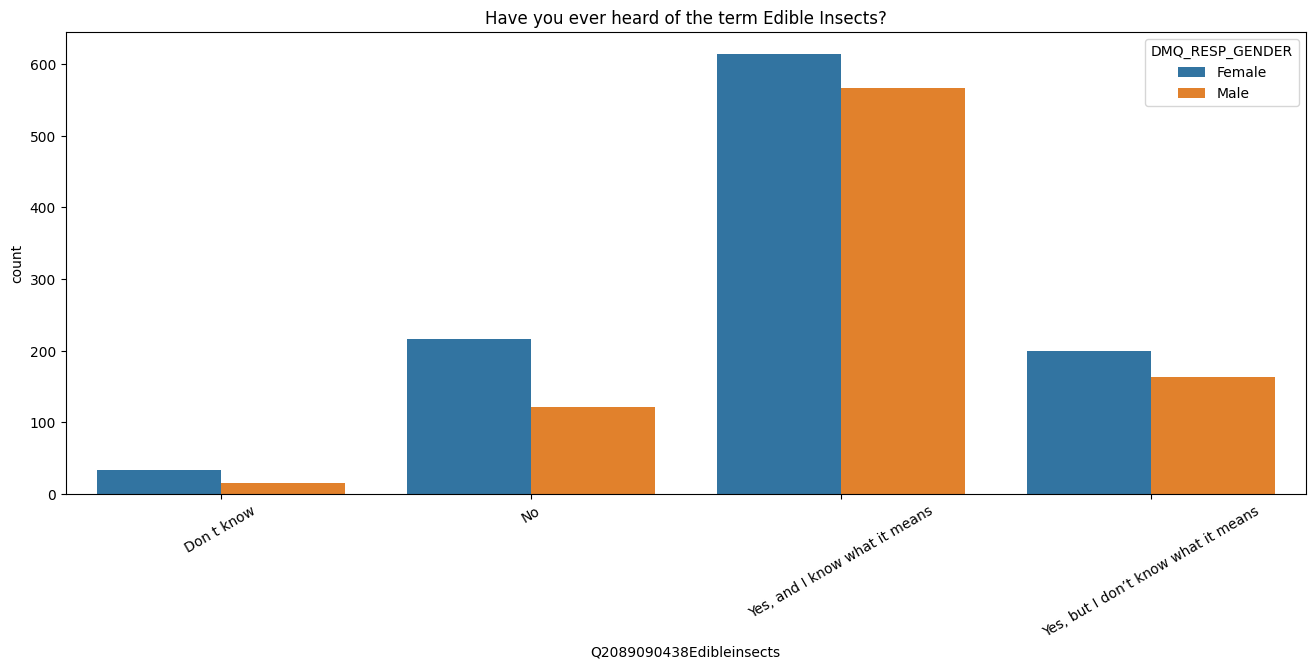

In [29]:
plt.figure(figsize=(16, 6))

plot = sns.barplot(grouped_data, x="Q2089090438Edibleinsects", y="count", hue="DMQ_RESP_GENDER").set_title("Have you ever heard of the term Edible Insects?")

#rotate x-axis labels
plt.xticks(rotation=30)
plt.yticks()

plt.show()

## Calculating the level of significance between sex and if the person know about edible insects

### Chi-square test

In [50]:
db_contingency = pd.crosstab(db['DMQ_RESP_GENDER'], db['Q2089090438Edibleinsects'])
db_contingency

Q2089090438Edibleinsects,Don t know,No,"Yes, and I know what it means","Yes, but I don’t know what it means"
DMQ_RESP_GENDER,,,,
Female,34,216,614,200
Male,16,121,566,163


In [51]:
chi2, p, dof, expected = stats.chi2_contingency(observed= db_contingency1)

In [52]:
crit = stats.chi2.ppf(q=0.95, df = 3)
print(crit)

7.814727903251179


In [75]:
p

0.00029085778861400423

In [79]:
chi2

18.869957702120814

In [53]:
if chi2>crit:
    print("The chi2 is greater than the critical value, so we can reject the null Hypothesys and accept that there is \n\
           significant relation between the sex and the knowledge of the term edible insects")

The chi2 is greater than the critical value, so we can reject the null Hypothesys and accept that there is 
           significant relation between the sex and the knowledge of the term edible insects


### Cramer's V test

In [59]:
n = db_contingency.sum()
k = min(db_contingency.shape)
cramers_v = np.sqrt(chi2/(n*(k-1)))

In [60]:
cramers_v

Q2089090438Edibleinsects
Don t know                             0.614328
No                                     0.236630
Yes, and I know what it means          0.126457
Yes, but I don’t know what it means    0.227999
dtype: float64

V = 0 No association \
0 < V <= 0.1 Weak Association \
0.1 < v <= 0.3 Moderate association \
0.3 < v <= 0.5 Strong Association \
V > 0.5 Very Strong Association

### To what Extension you find eating insects safe or unsafe (Male Female Analysis)

In [ ]:
# Group by the relevant columns and count occurrences
grouped_data = db_1.groupby(['Q2055782931', 'DMQ_RESP_GENDER']).size().reset_index(name='count')

#Calculate the percentage of people that chosen each answer
percent_df = pd.DataFrame(grouped_data['count']/grouped_data['count'].sum()*100)
percent_df.columns = ['Percentage']
joined = pd.concat([percent_df, grouped_data], axis=1, join="inner")

In [ ]:
# Pivot the DataFrame
pivot_df = joined.pivot(index='Q2055782931', columns='DMQ_RESP_GENDER', values='Percentage')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create a base bottom position for each bar (initially zero)
bottom = pd.Series([0] * len(pivot_df), index=pivot_df.index)

# Plot each gender's data as a separate bar on top of the previous one to create a stacked effect
colors = sns.color_palette("pastel")

for i, gender in enumerate(pivot_df.columns):
    sns.barplot(
        x=pivot_df.index,
        y=pivot_df[gender],
        color=colors[i],
        label=gender,
        ax=ax,
        bottom=bottom
    )
    bottom += pivot_df[gender]

# Customize the plot
ax.set_title("To what Extent do you find eating insects safe or unsafe (Male Female Analysis)")
ax.set_xlabel("Response")
ax.set_ylabel("Percentage")
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate the x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
safe_to_eat = pivot_df.loc['1. Very safe'].sum()+pivot_df.loc['2. Fairly safe'].sum()
Neutral = pivot_df.loc['3. Neither safe nor unsafe'].sum()
Unsafe_to_eat = pivot_df.loc['4. Fairly unsafe'].sum()+pivot_df.loc['5. Very unsafe'].sum()
no_opinion = pivot_df.loc['6. Dont know'].sum()


women_safe_to_eat = (pivot_df.loc['1. Very safe'][0] + pivot_df.loc['2. Fairly safe'][0])/safe_to_eat*100
women_Neutral = pivot_df.loc['3. Neither safe nor unsafe'][0]/Neutral*100
women_Unsafe_to_eat = (pivot_df.loc['4. Fairly unsafe'][0] + pivot_df.loc['5. Very unsafe'][0])/Unsafe_to_eat*100
women_no_opinion = pivot_df.loc['6. Dont know'][0]/no_opinion*100

men_safe_to_eat = (pivot_df.loc['1. Very safe'][1] + pivot_df.loc['2. Fairly safe'][1])/safe_to_eat*100
men_Neutral = pivot_df.loc['3. Neither safe nor unsafe'][1]/Neutral*100
men_Unsafe_to_eat = (pivot_df.loc['4. Fairly unsafe'][1] + pivot_df.loc['5. Very unsafe'][1])/Unsafe_to_eat*100
men_no_opinion = pivot_df.loc['6. Dont know'][1]/no_opinion*100


In [ ]:
print(f"Insights: \n\
           {safe_to_eat.round(2)}% of people consider Insects as Safe to eat, of which {women_safe_to_eat.round(2)}% are women and {men_safe_to_eat.round(2)}% are men \n\
           {Neutral.round(2)}% of people consider Insects neither as safe of unsafe, of which {women_Neutral.round(2)}% are women and {men_Neutral.round(2)}% are men \n\
           {Unsafe_to_eat.round(2)}% of people consider Insects as unsafe to eat, of which {women_Unsafe_to_eat.round(2)}% are women and {men_Unsafe_to_eat.round(2)}% are men \n\
           {no_opinion.round(2)}% of people don't have an opinion, of which {women_no_opinion.round(2)}% are women and {men_no_opinion.round(2)}% are men \n\
           \n\
           It was a quite balanced opinion, with tendency that men are more willing to consider insects as safe then women. ")




### How willing the person is to try Edible Insects?

In [ ]:
# Group by the relevant columns and count occurrences
grouped_data = db_1.groupby(['Q2018263715Edibleinsectsegmealwormsgrasshoppers', 'DMQ_RESP_GENDER']).size().reset_index(name='count')

#Calculate the percentage of people that chosen each answer
percent_df = pd.DataFrame(grouped_data['count']/grouped_data['count'].sum()*100)
percent_df.columns = ['Percentage']
joined = pd.concat([percent_df, grouped_data], axis=1, join="inner")

# Pivot the DataFrame
pivot_df = joined.pivot(index='Q2018263715Edibleinsectsegmealwormsgrasshoppers', columns='DMQ_RESP_GENDER', values='Percentage')


In [ ]:
plt.figure(figsize=(16, 6))

plot = sns.barplot(grouped_data, x="Q2018263715Edibleinsectsegmealwormsgrasshoppers", y="count", hue="DMQ_RESP_GENDER").set_title("How willing the person is to try Edible Insects?")

#rotate x-axis labels
plt.xticks(rotation=30)
plt.yticks()

plt.show()

In [ ]:
willing = pivot_df.loc['1. Very willing'].sum()+pivot_df.loc['2. Somewhat willing'].sum()
Neutral = pivot_df.loc['3. Neither willing nor unwilling'].sum()
Unwilling = pivot_df.loc['4. Somewhat unwilling'].sum()+pivot_df.loc['5. Very unwilling'].sum()
no_opinion = pivot_df.loc['6. Dont know'].sum()
Already_Tried = pivot_df.loc['7. I’ve already tried this'].sum()


women_willing = (pivot_df.loc['1. Very willing'][0] + pivot_df.loc['2. Somewhat willing'][0])/safe_to_eat*100
women_Neutral = pivot_df.loc['3. Neither willing nor unwilling'][0]/Neutral*100
women_Unwilling = (pivot_df.loc['4. Somewhat unwilling'][0] + pivot_df.loc['5. Very unwilling'][0])/Unsafe_to_eat*100
women_no_opinion = pivot_df.loc['6. Dont know'][0]/no_opinion*100
Already_Tried = pivot_df.loc['7. I’ve already tried this'][0]

men_willing = (pivot_df.loc['1. Very willing'][1] + pivot_df.loc['2. Somewhat willing'][1])/safe_to_eat*100
men_Neutral = pivot_df.loc['3. Neither willing nor unwilling'][1]/Neutral*100
men_Unwilling = (pivot_df.loc['4. Somewhat unwilling'][1] + pivot_df.loc['5. Very unwilling'][1])/Unsafe_to_eat*100
men_no_opinion = pivot_df.loc['6. Dont know'][1]/no_opinion*100
Already_Tried = pivot_df.loc['7. I’ve already tried this'][0]

In [ ]:
print(f"Insights: \n\
           {willing.round(2)}% of people are willing to eat insects, of which {women_willing.round(2)}% are women and {men_willing.round(2)}% are men \n\
           {Neutral.round(2)}% of people are not willing nor unwilling, of which {women_Neutral.round(2)}% are women and {men_Neutral.round(2)}% are men \n\
           {Unwilling.round(2)}% of people are unwilling, of which {women_Unwilling.round(2)}% are women and {men_Unwilling.round(2)}% are men \n\
           {no_opinion.round(2)}% of people don't have an opinion, of which {women_no_opinion.round(2)}% are women and {men_no_opinion.round(2)}% are men \n\
           \n\
           Woman are less willing in general to try insects then man. It seems that men are more open to the idea ")


## Analysis by Age

In [ ]:
total_people_interview = db_1['DMQ_RESP_AGE_RECODED'].count()
total_16_24 = db_1[db_1['DMQ_RESP_AGE_RECODED'] == '16-24']['DMQ_RESP_AGE_RECODED'].count()
total_25_34 = db_1[db_1['DMQ_RESP_AGE_RECODED'] == '25-34']['DMQ_RESP_AGE_RECODED'].count()
total_35_44 = db_1[db_1['DMQ_RESP_AGE_RECODED'] == '35-44']['DMQ_RESP_AGE_RECODED'].count()
total_45_54 = db_1[db_1['DMQ_RESP_AGE_RECODED'] == '45-54']['DMQ_RESP_AGE_RECODED'].count()
total_55_64 = db_1[db_1['DMQ_RESP_AGE_RECODED'] == '55-64']['DMQ_RESP_AGE_RECODED'].count()
total_65_75 = db_1[db_1['DMQ_RESP_AGE_RECODED'] == '65-75']['DMQ_RESP_AGE_RECODED'].count()
percentage_16_24 = total_16_24/total_people_interview*100
percentage_25_34 = total_25_34/total_people_interview*100
percentage_35_44 = total_35_44/total_people_interview*100
percentage_45_54 = total_45_54/total_people_interview*100
percentage_65_75 = total_65_75/total_people_interview*100

print(f"The interview had a total of {total_people_interview}. Being {total_female} Females ({percentage_female.round(2)}%) and {total_male} Males ({percentage_male.round(2)}%)")


In [ ]:
# Group by the relevant columns and count occurrences
grouped_data = db_1.groupby(['Q2089090438Edibleinsects', 'DMQ_RESP_AGE_RECODED']).size().reset_index(name='count')

# Pivot the data to get counts in a suitable format for plotting
pivot_df = grouped_data.pivot(index='Q2089090438Edibleinsects', columns='DMQ_RESP_AGE_RECODED', values='count').fillna(0)

In [ ]:
plt.figure(figsize=(16, 6))

plot = sns.barplot(grouped_data, x="Q2089090438Edibleinsects", y="count", hue="DMQ_RESP_AGE_RECODED").set_title("Have you ever heard of the term Edible Insects?")

#rotate x-axis labels
plt.xticks(rotation=30)
plt.yticks()

plt.show()

In [ ]:
# Group by the relevant columns and count occurrences
grouped_data = db_1.groupby(['Q2055782931', 'DMQ_RESP_AGE_RECODED']).size().reset_index(name='count')

#Calculate the percentage of people that chosen each answer
percent_df = pd.DataFrame(grouped_data['count']/grouped_data['count'].sum()*100)
percent_df.columns = ['Percentage']
joined = pd.concat([percent_df, grouped_data], axis=1, join="inner")

# Pivot the data to get counts in a suitable format for plotting
pivot_df = grouped_data.pivot(index='Q2055782931', columns='DMQ_RESP_AGE_RECODED', values='count').fillna(0)

In [ ]:
plt.figure(figsize=(16, 6))

plot = sns.barplot(grouped_data, x="Q2055782931", y="count", hue="DMQ_RESP_AGE_RECODED").set_title("Have you ever heard of the term Edible Insects?")

#rotate x-axis labels
plt.xticks(rotation=30)
plt.yticks()

plt.show()

In [ ]:
pivot_df

In [ ]:
# Calculate total sums for each category
safe_to_eat = pivot_df.loc['1. Very safe'].sum() + pivot_df.loc['2. Fairly safe'].sum()
neutral = pivot_df.loc['3. Neither safe nor unsafe'].sum()
unsafe_to_eat = pivot_df.loc['4. Fairly unsafe'].sum() + pivot_df.loc['5. Very unsafe'].sum()
no_opinion = pivot_df.loc['6. Dont know'].sum()

# Initialize a dictionary to store the results
percentages = {
    'safe_to_eat': [],
    'neutral': [],
    'unsafe_to_eat': [],
    'no_opinion': []
}

# List of age ranges for iteration
age_ranges = ['16-24', '25-34', '35-44', '45-54', '55-64', '65-75']

# Calculate the percentages for each age range
for age_range in age_ranges:
    safe_to_eat_percentage = (pivot_df.loc['1. Very safe'][age_range] + pivot_df.loc['2. Fairly safe'][age_range]) / safe_to_eat * 100
    neutral_percentage = pivot_df.loc['3. Neither safe nor unsafe'][age_range] / neutral * 100
    unsafe_to_eat_percentage = (pivot_df.loc['4. Fairly unsafe'][age_range] + pivot_df.loc['5. Very unsafe'][age_range]) / unsafe_to_eat * 100
    no_opinion_percentage = pivot_df.loc['6. Dont know'][age_range] / no_opinion * 100
    
    percentages['safe_to_eat'].append(safe_to_eat_percentage)
    percentages['neutral'].append(neutral_percentage)
    percentages['unsafe_to_eat'].append(unsafe_to_eat_percentage)
    percentages['no_opinion'].append(no_opinion_percentage)

# Convert the results into a DataFrame for better readability
percentages_df = pd.DataFrame(percentages, index=age_ranges)
print(percentages_df)

In [ ]:
percentages_df['safe_to_eat'].sum()

In [ ]:
# Plotting the individual line graphs for each category
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

fig.suptitle('Perceived Safety of Food by Age Range - Individual Categories', fontsize=16)

axs[0, 0].plot(age_ranges, percentages_df['safe_to_eat'], marker='o')
axs[0, 0].set_title('Safe to Eat')
axs[0, 0].set_xlabel('Age Range')
axs[0, 0].set_ylabel('Percentage')
axs[0, 0].set_ylim(0, 50)
axs[0, 0].grid(True)

axs[0, 1].plot(age_ranges, percentages_df['neutral'], marker='o', color='orange')
axs[0, 1].set_title('Neutral')
axs[0, 1].set_xlabel('Age Range')
axs[0, 1].set_ylabel('Percentage')
axs[0, 1].set_ylim(0, 50)
axs[0, 1].grid(True)

axs[1, 0].plot(age_ranges, percentages_df['unsafe_to_eat'], marker='o', color='red')
axs[1, 0].set_title('Unsafe to Eat')
axs[1, 0].set_xlabel('Age Range')
axs[1, 0].set_ylabel('Percentage')
axs[1, 0].set_ylim(0, 50)
axs[1, 0].grid(True)

axs[1, 1].plot(age_ranges, percentages_df['no_opinion'], marker='o', color='green')
axs[1, 1].set_title('No Opinion')
axs[1, 1].set_xlabel('Age Range')
axs[1, 1].set_ylabel('Percentage')
axs[1, 1].set_ylim(0, 50)
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()





### Analysis by Marital Status

In [ ]:
# Group by the relevant columns and count occurrences
grouped_data = db_1.groupby(['Q2089090438Edibleinsects', 'DMQ_UK01MAR']).size().reset_index(name='count')

# Pivot the data to get counts in a suitable format for plotting
pivot_df = grouped_data.pivot(index='Q2089090438Edibleinsects', columns='DMQ_UK01MAR', values='count').fillna(0)

In [ ]:
plt.figure(figsize=(16, 6))

plot = sns.barplot(grouped_data, x="Q2089090438Edibleinsects", y="count", hue="DMQ_UK01MAR").set_title("Have you ever heard of the term Edible Insects?")

#rotate x-axis labels
plt.xticks(rotation=30)
plt.yticks()

plt.show()

In [ ]:
# Group by the relevant columns and count occurrences
grouped_data = db_1.groupby(['Q2055782931', 'DMQ_UK01MAR']).size().reset_index(name='count')

#Calculate the percentage of people that chosen each answer
percent_df = pd.DataFrame(grouped_data['count']/grouped_data['count'].sum()*100)
percent_df.columns = ['Percentage']
joined = pd.concat([percent_df, grouped_data], axis=1, join="inner")

pivot_df = grouped_data.pivot(index='Q2055782931', columns='DMQ_UK01MAR', values='count').fillna(0)

In [ ]:
pivot_df

In [ ]:
plt.figure(figsize=(16, 6))

plot = sns.barplot(grouped_data, x="Q2055782931", y="count", hue="DMQ_UK01MAR").set_title("Have you ever heard of the term Edible Insects?")

#rotate x-axis labels
plt.xticks(rotation=30)
plt.yticks()

plt.show()

In [ ]:
# Calculate total sums for each category
safe_to_eat = pivot_df.loc['1. Very safe'].sum() + pivot_df.loc['2. Fairly safe'].sum()
neutral = pivot_df.loc['3. Neither safe nor unsafe'].sum()
unsafe_to_eat = pivot_df.loc['4. Fairly unsafe'].sum() + pivot_df.loc['5. Very unsafe'].sum()
no_opinion = pivot_df.loc['6. Dont know'].sum()

# Initialize a dictionary to store the results
percentages = {
    'safe_to_eat': [],
    'neutral': [],
    'unsafe_to_eat': [],
    'no_opinion': []
}

# List of age ranges for iteration
age_ranges = ['Divorced', 'Domestic Partner', 'Married / Civil partnership', 'Never Married (Single)', 'Separated', 'Widowed']

# Calculate the percentages for each age range
for age_range in age_ranges:
    safe_to_eat_percentage = (pivot_df.loc['1. Very safe'][age_range] + pivot_df.loc['2. Fairly safe'][age_range]) / safe_to_eat * 100
    neutral_percentage = pivot_df.loc['3. Neither safe nor unsafe'][age_range] / neutral * 100
    unsafe_to_eat_percentage = (pivot_df.loc['4. Fairly unsafe'][age_range] + pivot_df.loc['5. Very unsafe'][age_range]) / unsafe_to_eat * 100
    no_opinion_percentage = pivot_df.loc['6. Dont know'][age_range] / no_opinion * 100
    
    percentages['safe_to_eat'].append(safe_to_eat_percentage)
    percentages['neutral'].append(neutral_percentage)
    percentages['unsafe_to_eat'].append(unsafe_to_eat_percentage)
    percentages['no_opinion'].append(no_opinion_percentage)

# Convert the results into a DataFrame for better readability
percentages_df = pd.DataFrame(percentages, index=age_ranges)
print(percentages_df)

In [ ]:
# Plotting the individual line graphs for each category
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

fig.suptitle('Perceived Safety of Food by Age Range - Individual Categories', fontsize=16)

ax.tick_params(labelrotation=45)
    
axs[0, 0].plot(age_ranges, percentages_df['safe_to_eat'], marker='o')
axs[0, 0].set_title('Safe to Eat')
axs[0, 0].set_xlabel('Age Range')
axs[0, 0].set_ylabel('Percentage')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].set_ylim(0, 50)
axs[0, 0].grid(True)

axs[0, 1].plot(age_ranges, percentages_df['neutral'], marker='o', color='orange')
axs[0, 1].set_title('Neutral')
axs[0, 1].set_xlabel('Age Range')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].set_ylabel('Percentage')
axs[0, 1].set_ylim(0, 50)
axs[0, 1].grid(True)

axs[1, 0].plot(age_ranges, percentages_df['unsafe_to_eat'], marker='o', color='red')
axs[1, 0].set_title('Unsafe to Eat')
axs[1, 0].set_xlabel('Age Range')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_ylabel('Percentage')
axs[1, 0].set_ylim(0, 50)
axs[1, 0].grid(True)

axs[1, 1].plot(age_ranges, percentages_df['no_opinion'], marker='o', color='green')
axs[1, 1].set_title('No Opinion')
axs[1, 1].set_xlabel('Age Range')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].set_ylabel('Percentage')
axs[1, 1].set_ylim(0, 50)
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


### Analysis by Family size

In [ ]:
# Group by the relevant columns and count occurrences
grouped_data = db_1.groupby(['Q2089090438Edibleinsects', 'DMQ_KIDS02']).size().reset_index(name='count')

# Pivot the data to get counts in a suitable format for plotting
pivot_df = grouped_data.pivot(index='Q2089090438Edibleinsects', columns='DMQ_KIDS02', values='count').fillna(0)

In [ ]:
pivot_df

In [ ]:
plt.figure(figsize=(16, 6))

plot = sns.barplot(grouped_data, x="Q2089090438Edibleinsects", y="count", hue="DMQ_KIDS02").set_title("Have you ever heard of the term Edible Insects?")

#rotate x-axis labels
plt.xticks(rotation=30)
plt.yticks()

plt.show()

In [ ]:
# Group by the relevant columns and count occurrences
grouped_data = db_1.groupby(['Q2055782931', 'DMQ_KIDS02']).size().reset_index(name='count')

#Calculate the percentage of people that chosen each answer
percent_df = pd.DataFrame(grouped_data['count']/grouped_data['count'].sum()*100)
percent_df.columns = ['Percentage']
joined = pd.concat([percent_df, grouped_data], axis=1, join="inner")

pivot_df = grouped_data.pivot(index='Q2055782931', columns='DMQ_KIDS02', values='count').fillna(0)

In [ ]:
plt.figure(figsize=(16, 6))

plot = sns.barplot(grouped_data, x="Q2055782931", y="count", hue="DMQ_KIDS02").set_title("Have you ever heard of the term Edible Insects?")

#rotate x-axis labels
plt.xticks(rotation=30)
plt.yticks()

plt.show()

In [ ]:
# Calculate total sums for each category
safe_to_eat = pivot_df.loc['1. Very safe'].sum() + pivot_df.loc['2. Fairly safe'].sum()
neutral = pivot_df.loc['3. Neither safe nor unsafe'].sum()
unsafe_to_eat = pivot_df.loc['4. Fairly unsafe'].sum() + pivot_df.loc['5. Very unsafe'].sum()
no_opinion = pivot_df.loc['6. Dont know'].sum()

# Initialize a dictionary to store the results
percentages = {
    'safe_to_eat': [],
    'neutral': [],
    'unsafe_to_eat': [],
    'no_opinion': []
}

# List of age ranges for iteration
age_ranges = [0, 1, 2, 3, 4, 5, 6, 10]

# Calculate the percentages for each age range
for age_range in age_ranges:
    safe_to_eat_percentage = (pivot_df.loc['1. Very safe'][age_range] + pivot_df.loc['2. Fairly safe'][age_range]) / safe_to_eat * 100
    neutral_percentage = pivot_df.loc['3. Neither safe nor unsafe'][age_range] / neutral * 100
    unsafe_to_eat_percentage = (pivot_df.loc['4. Fairly unsafe'][age_range] + pivot_df.loc['5. Very unsafe'][age_range]) / unsafe_to_eat * 100
    no_opinion_percentage = pivot_df.loc['6. Dont know'][age_range] / no_opinion * 100
    
    percentages['safe_to_eat'].append(safe_to_eat_percentage)
    percentages['neutral'].append(neutral_percentage)
    percentages['unsafe_to_eat'].append(unsafe_to_eat_percentage)
    percentages['no_opinion'].append(no_opinion_percentage)

# Convert the results into a DataFrame for better readability
percentages_df = pd.DataFrame(percentages, index=age_ranges)
print(percentages_df)

In [ ]:
# Plotting the individual line graphs for each category
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

fig.suptitle('Perceived Safety of Food by Number of Kids - Individual Categories', fontsize=16)

ax.tick_params(labelrotation=45)
    
axs[0, 0].plot(age_ranges, percentages_df['safe_to_eat'], marker='o')
axs[0, 0].set_title('Safe to Eat')
axs[0, 0].set_xlabel('Number of Kids')
axs[0, 0].set_ylabel('Percentage')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].set_ylim(0, 100)
axs[0, 0].grid(True)

axs[0, 1].plot(age_ranges, percentages_df['neutral'], marker='o', color='orange')
axs[0, 1].set_title('Neutral')
axs[0, 1].set_xlabel('Number of Kids')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].set_ylabel('Percentage')
axs[0, 1].set_ylim(0, 100)
axs[0, 1].grid(True)

axs[1, 0].plot(age_ranges, percentages_df['unsafe_to_eat'], marker='o', color='red')
axs[1, 0].set_title('Unsafe to Eat')
axs[1, 0].set_xlabel('Number of Kids')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_ylabel('Percentage')
axs[1, 0].set_ylim(0, 100)
axs[1, 0].grid(True)

axs[1, 1].plot(age_ranges, percentages_df['no_opinion'], marker='o', color='green')
axs[1, 1].set_title('No Opinion')
axs[1, 1].set_xlabel('Number of Kids')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].set_ylabel('Percentage')
axs[1, 1].set_ylim(0, 100)
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


### Analysis by Income

In [ ]:
# Group by the relevant columns and count occurrences
grouped_data = db_1.groupby(['Q2089090438Edibleinsects', 'DMQ_UK02INC']).size().reset_index(name='count')

# Pivot the data to get counts in a suitable format for plotting
pivot_df = grouped_data.pivot(index='Q2089090438Edibleinsects', columns='DMQ_UK02INC', values='count').fillna(0)

In [ ]:
plt.figure(figsize=(16, 6))

plot = sns.barplot(grouped_data, x="Q2089090438Edibleinsects", y="count", hue="DMQ_UK02INC").set_title("Have you ever heard of the term Edible Insects?")

#rotate x-axis labels
plt.xticks(rotation=30)
plt.yticks()

plt.show()

In [ ]:
# Group by the relevant columns and count occurrences
grouped_data = db_1.groupby(['Q2055782931', 'DMQ_UK02INC']).size().reset_index(name='count')

#Calculate the percentage of people that chosen each answer
percent_df = pd.DataFrame(grouped_data['count']/grouped_data['count'].sum()*100)
percent_df.columns = ['Percentage']
joined = pd.concat([percent_df, grouped_data], axis=1, join="inner")

pivot_df = grouped_data.pivot(index='Q2055782931', columns='DMQ_UK02INC', values='count').fillna(0)
pivot_df

In [ ]:
#Combining the ranges because the business does not need it so specified
pivot_df['£5,000 - 19,999'] = pivot_df['£10,000 - 14,999'] + pivot_df['£15,000 - 19,999'] + pivot_df['£5,000 - 9,999']
pivot_df['£20,000 - 44,999'] = pivot_df['£25,000 - 34,999'] + pivot_df['£35,000 - 44,999'] + pivot_df['£20,000 - 24,999']
pivot_df['£45,000 - 99,999'] = pivot_df['£45,000 - 54,999'] + pivot_df['£55,000 - 99,999'] 
pivot_df = pivot_df.drop(['£10,000 - 14,999', '£15,000 - 19,999', '£20,000 - 24,999', '£25,000 - 34,999', '£35,000 - 44,999', '£5,000 - 9,999', '£55,000 - 99,999', '£45,000 - 54,999'  ], axis =1)

In [ ]:
pivot_df

In [ ]:
# Calculate total sums for each category
safe_to_eat = pivot_df.loc['1. Very safe'].sum() + pivot_df.loc['2. Fairly safe'].sum()
neutral = pivot_df.loc['3. Neither safe nor unsafe'].sum()
unsafe_to_eat = pivot_df.loc['4. Fairly unsafe'].sum() + pivot_df.loc['5. Very unsafe'].sum()
no_opinion = pivot_df.loc['6. Dont know'].sum()

# Initialize a dictionary to store the results
percentages = {
    'safe_to_eat': [],
    'neutral': [],
    'unsafe_to_eat': [],
    'no_opinion': []
}

# List of age ranges for iteration
age_ranges = ['Prefer not to answer', 'Under £5,000', '£5,000 - 19,999', '£20,000 - 44,999', '£45,000 - 99,999', '£100,000 or more']

# Calculate the percentages for each age range
for age_range in age_ranges:
    safe_to_eat_percentage = (pivot_df.loc['1. Very safe'][age_range] + pivot_df.loc['2. Fairly safe'][age_range]) / safe_to_eat * 100
    neutral_percentage = pivot_df.loc['3. Neither safe nor unsafe'][age_range] / neutral * 100
    unsafe_to_eat_percentage = (pivot_df.loc['4. Fairly unsafe'][age_range] + pivot_df.loc['5. Very unsafe'][age_range]) / unsafe_to_eat * 100
    no_opinion_percentage = pivot_df.loc['6. Dont know'][age_range] / no_opinion * 100
    
    percentages['safe_to_eat'].append(safe_to_eat_percentage)
    percentages['neutral'].append(neutral_percentage)
    percentages['unsafe_to_eat'].append(unsafe_to_eat_percentage)
    percentages['no_opinion'].append(no_opinion_percentage)

# Convert the results into a DataFrame for better readability
percentages_df = pd.DataFrame(percentages, index=age_ranges)
print(percentages_df)

In [ ]:
# Plotting the individual line graphs for each category
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

fig.suptitle('Perceived Safety of Food by Income - Individual Categories', fontsize=16)

ax.tick_params(labelrotation=45)
    
axs[0, 0].plot(age_ranges, percentages_df['safe_to_eat'], marker='o')
axs[0, 0].set_title('Safe to Eat')
axs[0, 0].set_xlabel('Number of Kids')
axs[0, 0].set_ylabel('Percentage')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].set_ylim(0, 100)
axs[0, 0].grid(True)

axs[0, 1].plot(age_ranges, percentages_df['neutral'], marker='o', color='orange')
axs[0, 1].set_title('Neutral')
axs[0, 1].set_xlabel('Number of Kids')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].set_ylabel('Percentage')
axs[0, 1].set_ylim(0, 100)
axs[0, 1].grid(True)

axs[1, 0].plot(age_ranges, percentages_df['unsafe_to_eat'], marker='o', color='red')
axs[1, 0].set_title('Unsafe to Eat')
axs[1, 0].set_xlabel('Number of Kids')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_ylabel('Percentage')
axs[1, 0].set_ylim(0, 100)
axs[1, 0].grid(True)

axs[1, 1].plot(age_ranges, percentages_df['no_opinion'], marker='o', color='green')
axs[1, 1].set_title('No Opinion')
axs[1, 1].set_xlabel('Number of Kids')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].set_ylabel('Percentage')
axs[1, 1].set_ylim(0, 100)
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

### You said you would be unwilling to try edible insects (e.g. mealworms, grasshoppers) in your diet. Why is this?

In [ ]:
seldata = db_1[['Q2064542117__1', 'Q2064542117__2', 'Q2064542117__3', 'Q2064542117__4', 'Q2064542117__5', 'Q2064542117__6', 'Q2064542117__7', 'Q2064542117__8', 
               'Q2064542117__9','Q2064542117__10','Q2064542117__11','Q2064542117__12','Q2064542117__13', 'Q2064542117__14', 'Q2064542117__15', 'Q2064542117__16', 'DMQ_RESP_GENDER']]

In [ ]:
counts = seldata.apply(lambda x: (x == '1').sum()).reset_index()
counts.columns = ['Question', 'Counts']
counts = counts[counts['Counts']!=0]	
counts = counts.sort_values("Counts", ascending=False)


In [ ]:
counts["Question"] = counts["Question"].replace('Q2064542117__1', 'I think it’s unhealthy')
counts["Question"] = counts["Question"].replace('Q2064542117__2', 'I think it’s expensive')
counts["Question"] = counts["Question"].replace('Q2064542117__3', 'It’s not readily available / easy to find')
counts["Question"] = counts["Question"].replace('Q2064542117__4', 'I don’t know how to cook / prepare this')
counts["Question"] = counts["Question"].replace('Q2064542117__5', 'I find it off-putting')
counts["Question"] = counts["Question"].replace('Q2064542117__6', 'I don’t like to try unfamiliar foods')
counts["Question"] = counts["Question"].replace('Q2064542117__7', 'I’m concerned about regulation')
counts["Question"] = counts["Question"].replace('Q2064542117__8', 'I don’t think it’s safe to eat')
counts["Question"] = counts["Question"].replace('Q2064542117__9', 'It wouldn’t taste good')
counts["Question"] = counts["Question"].replace('Q2064542117__10', 'I don’t see a need to eat this')
counts["Question"] = counts["Question"].replace('Q2064542117__11', 'For religious and/or cultural reasons')
counts["Question"] = counts["Question"].replace('Q2064542117__12', 'For medical reasons or other dietary restriction (e.g. an allergy)')
counts["Question"] = counts["Question"].replace('Q2064542117__13', 'For ethical reasons – I don’t agree with eating this')
counts["Question"] = counts["Question"].replace('Q2064542117__14', 'I like to eat traditional meats')
counts["Question"] = counts["Question"].replace('Q2064542117__15', 'Other reasons')
counts["Question"] = counts["Question"].replace('Q2064542117__16', 'I don’t know')


In [ ]:
# Assuming count_df_sel is your DataFrame containing counts
plt.figure(figsize=(18, 8))  

# Plot the data
sns.barplot(data=counts, y='Question', x='Counts', orient='h')

# Set title and axis labels
plt.title("Rasons people would not like to try insects", fontsize=14, pad=20)
plt.xlabel("Count", fontsize=12, labelpad=10)
plt.ylabel("Reasons", fontsize=12, labelpad=10)

# Add text annotations to the bars
for index, row in counts.iterrows():
    ax.text(row['Counts'], index, f'{row["Counts"]}', ha='center', va='center', fontsize=10, color='black')



plt.tight_layout()
plt.show()

In [ ]:
header = ['I think it’s unhealthy', 'I think it’s expensive', 'It’s not readily available / easy to find', 'I don’t know how to cook / prepare this',
          'I find it off-putting', 'I don’t like to try unfamiliar foods', 'I’m concerned about regulation', ' I don’t think it’s safe to eat', 'It wouldn’t taste good',
          'I don’t see a need to eat this', 'For religious and/or cultural reasons', 'For medical reasons or other dietary restriction (e.g. an allergy)', 'For ethical reasons – I don’t agree with eating this', 'I like to eat traditional meats',
          'Other reasons', 'I don’t know']

header2 = ['If I know it will make my diet healthier', ' If it became easily available for me to buy', ' If it looks appetising', 'If other people in my household or friends try it',
           ' If celebrities or influencers advise trying it', 'If it’s properly regulated', 'If I know it’s safe to eat', 'If an expert advises trying it', 'If it’s cheaper than traditional meat',
           'If I know it’s better for the environment', ' If I know it’s better for animal welfare', 'Other reasons', 'Nothing would make me try it', 'I don’t know']

header3 = ['For health reasons', 'For animal welfare reasons', 'For environmental or sustainability reasons (i.e. impact on climate change)', 'For financial reasons', 'Because I want a change',
          'Because of advice from friends or family', 'Because of advice from celebrities or influencers', 'Because of advice from experts', 'Because I don’t like to eat traditional meat', 'Because I trust that it’s properly regulated',
          'Because I think it’s safe to eat', 'Because it’s innovative', 'Because it gives me greater food choice', 'I like to try unfamiliar foods', 'Other reasons',
          'I don’t know']

In [ ]:
# Function to create count DataFrame for a specific gender
def count_occurrences_by_gender(df, gender):
    gender_df = df[df['DMQ_RESP_GENDER'] == gender]
    counts = {var: (gender_df[var] == '1').sum() for var in variables}
    return pd.DataFrame(counts, index=[0])

# Count occurrences of 1 for each gender
male_counts = count_occurrences_by_gender(seldata, 'Male')
female_counts = count_occurrences_by_gender(seldata, 'Female')



In [ ]:
count_df_sel.columns = header
male_counts.columns = header
female_counts.columns = header

In [ ]:

# Set up the figure size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot the data for females
plt.subplot(1, 2, 1)
sns.barplot(data=count_df_sel.query('gender == "female"').melt(var_name='variable', value_name='value'), y='variable', x='value', orient='h')
plt.title("Female")
plt.xlabel("Count of 1s", labelpad=10)
plt.ylabel("Variables", labelpad=10)

# Plot the data for males
plt.subplot(1, 2, 2)
sns.barplot(data=count_df_sel.query('gender == "male"').melt(var_name='variable', value_name='value'), y='variable', x='value', orient='h')
plt.title("Male")
plt.xlabel("Count of 1s", labelpad=10)
plt.ylabel("Variables", labelpad=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Is there a correlation between People who would eat insects and people who would eat Lab Grown meat? (Chi Square test)

In [ ]:
db.head()

In [ ]:
db_contingency = pd.crosstab(db1['Q2018263715Labgrownmeatsometimesreferredtoasculturedmeatorcu'], db1['Q2018263715Edibleinsectsegmealwormsgrasshoppers'], margins = True, margins_name = 'Total')

In [ ]:
db_contingency

In [ ]:
chi2, p, dof, expected = chi2_contingency(db_contingency)

print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)

In [ ]:
# Get row totals and column totals
row_totals = db_contingency.loc[:, 'Total'][:-1]
col_totals = db_contingency.loc['Total', :][:-1]

# Total number of observations
total = db_contingency.loc['Total', 'Total']

# Calculate expected frequencies
expected = np.outer(row_totals, col_totals) / total

# Convert to DataFrame for better readability
expected_df = pd.DataFrame(expected, 
                           index=db_contingency.index[:-1], 
                           columns=db_contingency.columns[:-1])
print("Expected Frequencies:")
print(expected_df)

In [ ]:
chi_squared = ((expected_df - db_contingency)**2/expected_df).sum().sum()
chi_squared

In [ ]:
crit = stats.chi2.ppf(q=0.95, df = 36)
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared, df=36)
print(p_value)

In [ ]:
stats.chi2.cdf(x=chi_squared, df=36)

In [ ]:
stats.chi2_contingency(observed= expected_df)